### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [46]:
data = pd.read_csv('data/coupons.csv')

In [6]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [37]:
# can tell which columns should return data based on info lower Non-Null values, but lay it our more legible
nan_count = data.isna().sum()
nan_count

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [38]:
#direction_same and direction_opp seems redundant. Could just be one column if the bool is inverse
dir_inverse_check = data.loc[data.query('(direction_same == 1 & direction_opp == 1) | (direction_same == 0 & direction_opp == 0)').index]
dir_inverse_check

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y


3. Decide what to do about your missing data -- drop, replace, other...

In [47]:
#drop car column, mostly NaN and available is useless
data = data.drop('car', axis=1)
# dropping direction_opp because redundant
data = data.drop('direction_opp', axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [48]:
# got to spell check
data.rename(columns={'passanger': 'passenger'}, inplace=True)
# rename 'Y' to 'accepted' for clarity
data.rename(columns={'Y': 'accepted'}, inplace=True)
# not sure how to fill missing data for remaining missing rows. no strong corelation
# just going to fill it as unknown
data = data.fillna('unknown')
data

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,accepted
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,never,unknown,4~8,1~3,1,0,0,0,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,unknown,4~8,1~3,1,0,0,0,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,never,unknown,4~8,1~3,1,1,0,0,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,unknown,4~8,1~3,1,1,0,0,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,never,unknown,4~8,1~3,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,never,1~3,4~8,1~3,1,0,0,1,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,never,1~3,4~8,1~3,1,0,0,0,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,never,1~3,4~8,1~3,1,0,0,1,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,never,1~3,4~8,1~3,1,1,1,0,0


In [49]:
nan_count2 = data.isna().sum()
nan_count2

destination             0
passenger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
accepted                0
dtype: int64

4. What proportion of the total observations chose to accept the coupon? 



In [56]:
#use value_counts to return frequency of yes or no bool
proportion = data['accepted'].value_counts(normalize=True)*100
print(f'Accepted: {proportion[1]}, Rejected: {proportion[0]}')

Accepted: 56.84326710816777, Rejected: 43.15673289183223


5. Use a bar plot to visualize the `coupon` column.

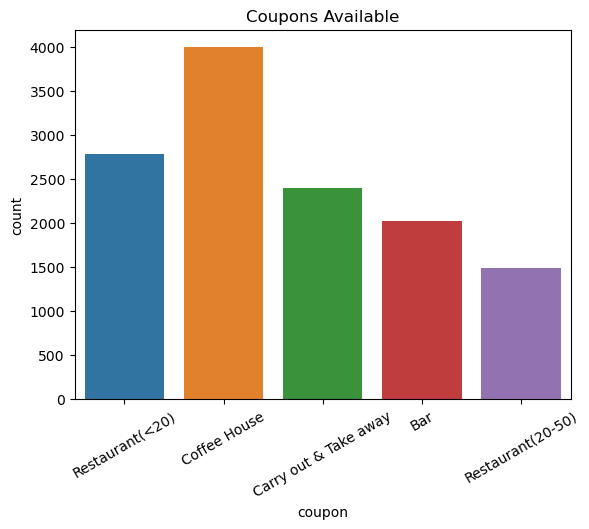

In [83]:
# visualize the coupons available (hue='accepted' to show a yes and no bar for each coupon)
sns.countplot(data, x='coupon')
plt.title('Coupons Available')
# cleaner look
plt.xticks(rotation=30)

plt.show()


6. Use a histogram to visualize the temperature column.

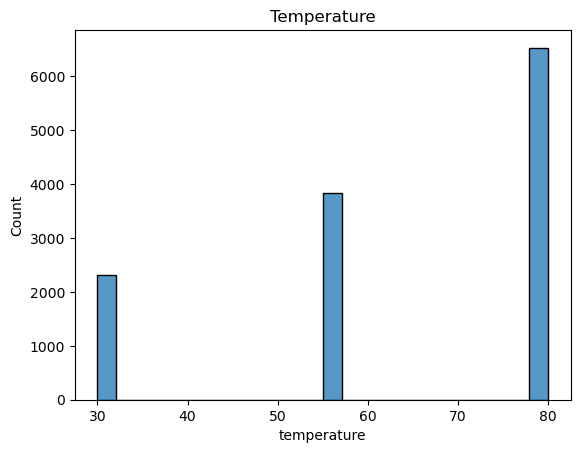

In [86]:
# Plot a basic histogram by temperature
sns.histplot(data, x='temperature')
plt.title('Temperature')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [104]:
# use query to filter by 'Bar'
df_bar = data.query('coupon == "Bar"') # 2017 rows
df_bar.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,accepted
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,never,unknown,4~8,1~3,1,1,0,0,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,never,unknown,4~8,1~3,1,0,0,1,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,never,unknown,4~8,1~3,1,1,1,0,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,never,less1,4~8,4~8,less1,1,0,0,0,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,never,less1,4~8,4~8,less1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,never,1~3,4~8,1~3,1,1,0,0,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,never,1~3,4~8,1~3,1,1,0,0,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,never,1~3,4~8,1~3,1,1,0,0,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,never,1~3,4~8,1~3,1,1,0,0,0


2. What proportion of bar coupons were accepted?


In [92]:
#added in halfway but function makes more sense for reusable code
def acceptance_rate(df):
    return df['accepted'].value_counts(normalize=True)*100

In [93]:
#use value_counts to return frequency of yes or no bool
prop_bar = acceptance_rate(df_bar)
print(f'Accepted: {prop_bar[1]}, Rejected: {prop_bar[0]}')

Accepted: 41.00148735746158, Rejected: 58.99851264253842


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [94]:
# create df less than and more than 3 visits
fewer_3 = df_bar.query("Bar in ('never', 'less1', '1~3')")
more_3 = df_bar.query("Bar in ('4~8', 'gt8')")
# calculate
prop_fewer = acceptance_rate(fewer_3)
prop_more = acceptance_rate(more_3)
# display
print(f'Acceptance rate of 3 or fewer: {prop_fewer[1]}')
print(f'Acceptance rate of 3 or more: {prop_more[1]}')

Acceptance rate of 3 or fewer: 37.061769616026716
Acceptance rate of 3 or more: 76.88442211055276


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [108]:
# create query params
query_bar_over_25 = "Bar in ('1~3','4~8','gt8') and age in ('26','31','36','46','50plus')"
# create dataframes from querys
df_bar_over_25 = df_bar.query(query_bar_over_25) # 388 rows
# everyone not in that sub group
df_other = df_bar.query("~("+query_bar_over_25+")") # 1629 rows 388+1629=2017 so got all rows
# # calculate
prop_bar_over_25 = acceptance_rate(df_bar_over_25)
prop_other = acceptance_rate(df_other)
# # display
print(f'Acceptance rate over 25 and visits bars more than once a month: {prop_bar_over_25[1]}')
print(f'Acceptance rate of everyone else: {prop_other[1]}')

Acceptance rate over 25 and visits more than once a month: 69.84536082474226
Acceptance rate of everyone else: 34.13136893799877


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [126]:
# create query params
query_bar_not_kid_pass_not_fff = "Bar in ('1~3','4~8','gt8') and passenger not in ('Kid(s)', 'Alone') and occupation != 'Farming Fishing & Forestry'"
# create dataframes from querys
df_bar_not_kid_pass_not_fff = df_bar.query(query_bar_not_kid_pass_not_fff) # 195 rows
# everyone not in that sub group
df_other_2 = df_bar.query("~("+query_bar_not_kid_pass_not_fff+")") # 1822 rows 195+1822=2017 so got all rows
# calculate
prop_bar_not_kid_pass_not_fff = acceptance_rate(df_bar_not_kid_pass_not_fff)
prop_other_2 = acceptance_rate(df_other_2)
# display
print(f'Acceptance rate visits bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry: {prop_bar_not_kid_pass_not_fff[1]}')
print(f'Acceptance rate of everyone else: {prop_other_2[1]}')

Acceptance rate visits bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry: 71.7948717948718
Acceptance rate of everyone else: 37.70581778265642


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [127]:
# create query params
query_bar_not_kid_pass_not_widow = "Bar in ('1~3','4~8','gt8') and passenger not in ('Kid(s)', 'Alone') and maritalStatus != 'Widowed'"
query_bar_under_30 = "Bar in ('1~3','4~8','gt8') and age in ('21','26','below21')"
query_bar_under50k_cheap_4 = "RestaurantLessThan20 in ('4~8','gt8') and income in ('Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999')"
# create dataframes
df_bar_not_kid_pass_not_widow = df_bar.query(query_bar_not_kid_pass_not_widow)
df_bar_under_30 = df_bar.query(query_bar_under_30)
df_bar_under50k_cheap_4 = df_bar.query(query_bar_under50k_cheap_4)
# calculate
prop_bar_not_kid_pass_not_widow = acceptance_rate(df_bar_not_kid_pass_not_widow)
prop_bar_under_30 = acceptance_rate(df_bar_under_30)
prop_bar_under50k_cheap_4 = acceptance_rate(df_bar_under50k_cheap_4)
# display
print(f'Acceptance rate go to bars more than once a month, had passengers that were not a kid, and were not widowed: {prop_bar_not_kid_pass_not_widow[1]}')
print(f'Acceptance rate go to bars more than once a month and are under the age of 30: {prop_bar_under_30[1]}')
print(f'Acceptance rate go to cheap restaurants more than 4 times a month and income is less than 50K: {prop_bar_under50k_cheap_4[1]}')


Acceptance rate go to bars more than once a month, had passengers that were not a kid, and were not widowed: 71.7948717948718
Acceptance rate go to bars more than once a month and are under the age of 30: 72.17391304347827
Acceptance rate go to cheap restaurants more than 4 times a month and income is less than 50K: 45.348837209302324


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Drivers are more likely to use the coupon if you go to the bar at least 4 times a month. However, there are other factors that make it more likely if you go at least once a month such as:
Drivers who have a passenger in the car who is not a kid. 
    It didn't make a difference if they are not widowed vs not having an occupation of Farming Fishing & Forestry
They are under 30 years old

It did not make them more likely to use the coupon if they have low income and eat at cheap restaurants 4 times a month

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  